In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Gender by Name**


This dataset combines raw counts for first/given names of male and female babies in those time periods, and then calculates a probability for a name given the aggregate count.  Source datasets are from government authorities:


*   US: Baby Names from Social Security Card Applications - National Data, 1880 to 2019

*   UK:  Baby names in England and Wales Statistical bulletins, 2011 to 2018
*   Canada: British Columbia 100 Years of Popular Baby names, 1918 to 2018


*   Australia:  Popular Baby Names, Attorney-General's Department, 1944 to 2019








*   Name: The first name of the baby.

*   Gender: The gender of the baby (M for Male, F for Female).
*   Count: The number of times the name was registered.


*   Probability: The probability of a baby being given that name, given the aggregate count.



In [5]:
import pandas as pd


file_path = '/content/drive/MyDrive/Dateset/name_gender_dataset.csv'
data = pd.read_csv(file_path)


data.head()


,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


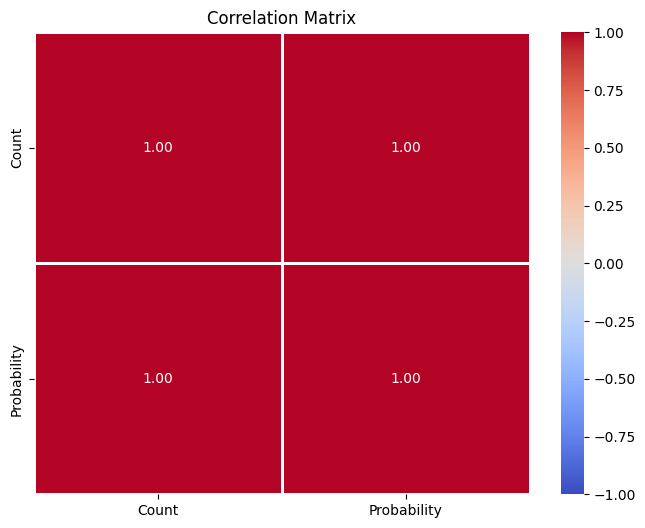

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
correlation_matrix = data[['Count', 'Probability']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Matrix')
plt.show()


strong positive correlation between Count and Probability,

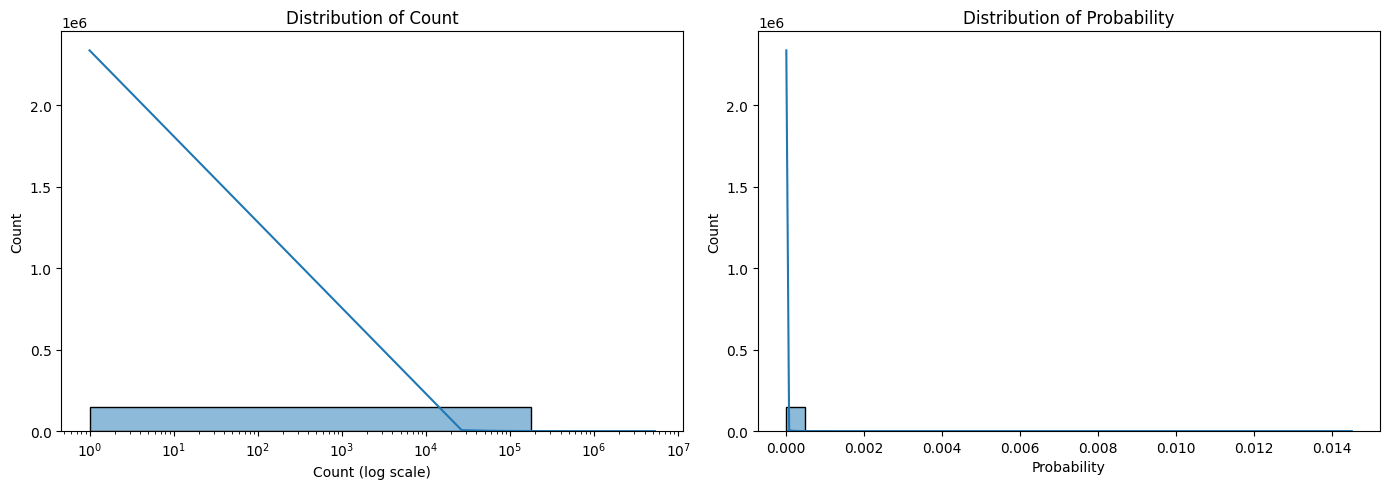

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram and KDE for 'Count'
sns.histplot(data['Count'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Count')
ax[0].set_xscale('log')
ax[0].set_xlabel('Count (log scale)')

# Histogram and KDE for 'Probability'
sns.histplot(data['Probability'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Probability')
ax[1].set_xlabel('Probability')

plt.tight_layout()
plt.show()


Count:

* The range is wide, from 1 to 5,304,407, reflecting the disparity in name popularity.
* The mean is 2,481, while the median is only 17, highlighting the skewness towards less frequent names.
* The standard deviation is very high at 46,454, indicating significant variance in name counts.

Probability:

* Similar to Count, the range from 2.74e-9 to 1.45e-2 shows variability in the probability of names being chosen.
* The mean is much smaller than the median, which is right-skewed distribution.


In [9]:
# Compute summary statistics for 'Count' and 'Probability'
summary_statistics = data[['Count', 'Probability']].describe()
summary_statistics


,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


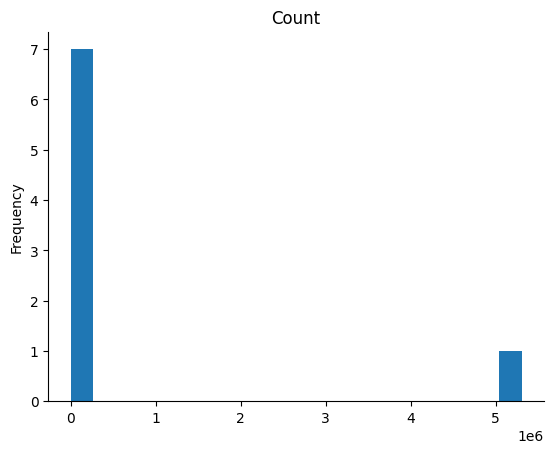

In [10]:
# @title Count

from matplotlib import pyplot as plt
summary_statistics['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
import numpy as np
from scipy.stats import t

# Separate data based on gender
male_data = data[data['Gender'] == 'M']['Probability']
female_data = data[data['Gender'] == 'F']['Probability']

# means and standard deviations
mean_male = np.mean(male_data)
mean_female = np.mean(female_data)
std_male = np.std(male_data, ddof=1)
std_female = np.std(female_data, ddof=1)
n_male = len(male_data)
n_female = len(female_data)

# standard error of the mean difference
sem = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))

# t-statistic
t_statistic = (mean_male - mean_female) / sem

# Degrees of freedom
df = min(n_male - 1, n_female - 1)

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Print results
(mean_male, mean_female, t_statistic, p_value)


(8.791401239364744e-06,
 5.5077895322617516e-06,
 4.2148325327756675,
 2.5034454053995958e-05)

Hypothesis Test Results
* Mean Probability for Male Names : 8.79 × 10-6
* Mean Probability for Female Names : 5.51 × 10-6
* T-Statistic : 4.21
* P-Value : 2.50 × 10-5